<center>
    <img src="https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Matched Filters
## Lecture Video:

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/1oJIWwnfilk" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [5]:
# For Google Colab Only
try:
    import google.colab
    #!pip uninstall plotly -y
    #!pip install plotly==3.10.0

except Exception as e:
    print("Not inside Google Colab: %s. Using standard configurations." % (e))

In [6]:
# For Google Colab Only
inColab=False
try:
    import google.colab
    import plotly.io as pio
    pio.renderers.default = 'colab'
    def enable_plotly_in_cell():
        import IPython
        from plotly.offline import init_notebook_mode
        display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
        init_notebook_mode(connected=False)
    inColab=True

except Exception as e:
    print("Not inside Google Colab: %s. Using standard configurations." % (e))

In [7]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/1tuLWEzDe3o" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Filters to reduce the influence of **noise or distortions**.

Assume: x(n) is the original signal, y(n) is the distorted signal.

Example: y(n)=x(n)+v(n), where v(n) is is assumed to be independent white noise.

 - **Matched filter** $h_M$(n):$y(n)*h_M(n)\rightarrow x(n)*h_M(n)$  (no signal fidelity, just **high SNR for detection**, in communication applications, where you would like to detect a 0 or 1, or any given **known** signal, usually a **deterministic signal**; object recognition in images, face recognition).

Remember the goal of a matched filter $h_M(n)$:

$$\large
y(n) * h_M(n) \rightarrow x(n+n_d)*h_M(n)
$$

with some signal delay $n_d$ (no signal fidelity, just high SNR for detection), where $y(n)=x(n+n_d)+v(n)$ is our (delayed) signal with additive noise $v(n)$.


Application examples are in communications, where you would like to detect a 0 or 1,for instance in CDMA, where each user gets a unique pseudo-random 1/0 sequence (so-called chip-sequences) to represent 0 or 1, in which different users and signals are separated using matched filters. Another example is for detecting **known** signals or patterns, like object or face recognition in images. In general we would like to **detect  deterministic** signals $x(n)$.

This means our goal is to **maximize the SNR** at the moment of detection, with our original signal $x(n)$ and noise $v(n)$,

$$\large
SNR=\frac{\mid x(n)*h_M(n) \mid ^2 } { E(\mid v(n)*h_M(n) \mid ^2 )}
$$

In [8]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/PvRUs_0q3z0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

We would like to maximize this SNR at the time of detection, using $h_M(n)$. To do that, first we assume $v(n)$ to be independent white noise. Then the denominator of the SNR expression is just a scaled fixed power expression. Using our formulation of a matrix $\boldsymbol V$ for the noise signal and the **row vector** $\boldsymbol {h_M}$ for our filter (again, it contains the time reversed impulse response), we obtain

$$\large
E(\mid v(n)*h_M(n) \mid ^2 )=E(\mid \boldsymbol V \cdot \boldsymbol h^T_M \mid ^2 )=E(\boldsymbol h_M \cdot \boldsymbol V^T \cdot \boldsymbol V \cdot \boldsymbol h^T_M)=
$$

  $$\large
  =\boldsymbol h_M \cdot E(\boldsymbol V^T \cdot \boldsymbol V) \cdot \boldsymbol h_M=\boldsymbol h_M \cdot \sigma_v^2 \cdot \boldsymbol I \cdot \boldsymbol h^T_M =
  $$

$$\large
= \sigma_v^2 \cdot \boldsymbol h_M \cdot \boldsymbol h^T_M
$$

(**Remember:** the autocorrelation function of noise is a weighted delta function, since noise samples are uncorrelated to all their neighboring samples, they are only correlated with themselves, and the correlation with itself is simply the noise power $\sigma^2$. The autocorrelation matrix $E(\boldsymbol V^T\cdot \boldsymbol V)$ hence has all zero entries, except on the diagonal, where it is the noise power, hence noise power times the identity matrix $\sigma^2 \cdot \boldsymbol I$ )

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/xiPk_99tjPI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

The last expression is simply the squared norm (the sum of the squares of its coefficients) of our vector of our filter coefficients $\boldsymbol h_M$ multiplied with the noise power $\sigma^2_v$.


Keeping the above **norm** of our filter vector $\boldsymbol h_M \cdot h_M^T$ **constant**, we only need to **maximize the numerator** of our SNR fraction to maximize the SNR,

$$\large
\mid x(n)*h_M(n)\mid^2$$

We rewrite our **numerator** as

$$\large
\mid x(n)*h_M(n) \mid ^2= \mid \boldsymbol x(n) \cdot \boldsymbol h_M^T \mid ^2
$$

analog to our matrix formulation, as a scalar vector multiplication, with $\boldsymbol h_M$as our row **vector** of the **time-reversed** matched filter impulse response, and now with only one row of the signal matrix **A** at a time, for only one convolution sample at a time. The signal **row vector** is

$$\large
\boldsymbol x(n) =[x(n), x(n+1),\ldots , x(n+L-1)]
$$
where L is the size of our filter vector.

We apply the Cauchy-Schwartz inequality (see e.g. <br>http://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality), which says, for 2 (column) vectors $\boldsymbol a$ and $\boldsymbol b$ and their scalar product we get

$$\large
\boldsymbol a^T \cdot \boldsymbol b  \leq  \sqrt{\boldsymbol a^t \cdot \boldsymbol a} \cdot \sqrt{\boldsymbol b^t \cdot \boldsymbol b}
$$

This is also written with the norm $\mid \mid a \mid \mid$ and $\langle \boldsymbol a, \boldsymbol b \rangle$ scalar product as

$$\large
\mid \langle  \boldsymbol a, \boldsymbol b \rangle \mid \leq \mid \mid \boldsymbol a \mid \mid \cdot \mid \mid \boldsymbol b \mid \mid
$$

We obtain equality if both vectors are co-linear, $\boldsymbol b=k\cdot \boldsymbol a$, with some scalar k. This tells us how to solve the maximization task.



In [10]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/R43rDe347tg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

We can now apply Cauchy-Schwartz if we set $\boldsymbol a =x(n)$ and $\boldsymbol b= \boldsymbol h_m$,

$$\large
\mid \boldsymbol x(n) \cdot \boldsymbol h_M^T \mid ^2 \leq \mid \mid \boldsymbol x(n) \mid \mid^2 \cdot  \mid \boldsymbol h_M \mid \mid ^2
$$

and we get the equality (the maximum) if we set

$$\large
\boldsymbol h_M= k \cdot \boldsymbol x(n)$$

where we can choose the factor as k=1.

Since we have this inequality for all time steps n of our convolution, we choose n where the row vector $\boldsymbol x(n)$ has the maximum energy. This is where we **capture the entire, non-zero, wave form** of our signal $\boldsymbol x(n)$with our filter. Since our filter vector $\boldsymbol {h_M}$ contains the **time-reversed impulse response**, we obtain the **entire time reversed signal** as our **matched filter**:


$$ \large
h_M(n)=x(L-1-n)
$$

assuming our signal to detect is located between $0 \leq n < L$.

Since we have a convolution of the signal with its time reverse version, we get a convolution length of $2L-1$ samples, with its maximum at the center, when both waveforms completely overlap, after L samples, which is exactly the signal length. Hence we get the **detection** of our signal after we completely received it, at the **end of our signal**.

**Observe:** Since we convolve the signal with the time-reversed version of our pattern to be detected, this becomes identical to computing the **correlation** of the signal with the pattern to be detected.

**Also Observe**: The **longer** the signal is, the **more energy** is captured in it, and the **higher the SNR** will be at the time of detection. This is important for instance for very weak signals, like in deep space communcations.

For the continuous-time version see, for instance: <br>http://www.ece.gatech.edu/research/labs/sarl/tutorials/ECE4606/14-MatchedFilter.pdf

**In Conclusion:** The matched filter has the shape of the time reversed signal to be searched for.<br>

In [11]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/9fCG5Nyvm_k" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

## Python Example

In [12]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qrS_XPAKAZ0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

In [13]:

import plotly.express as px
import plotly.tools as tls
import pandas as pd

import numpy as np

#Signal to detect:
sig = np.arange(0, 1.1, 0.1)
print("sig=",sig)

#Plotting with plotly (allows hovering and zooming and such):
"""
d = {'Signal': sig}
df = pd.DataFrame(data=d)
fig=px.line(df,title="An Example Signal")
fig.show()
"""

sig= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


'\nd = {\'Signal\': sig}\ndf = pd.DataFrame(data=d)\nfig=px.line(df,title="An Example Signal")\nfig.show()\n'

We put this signal to detect at some point in time in a longer signal,

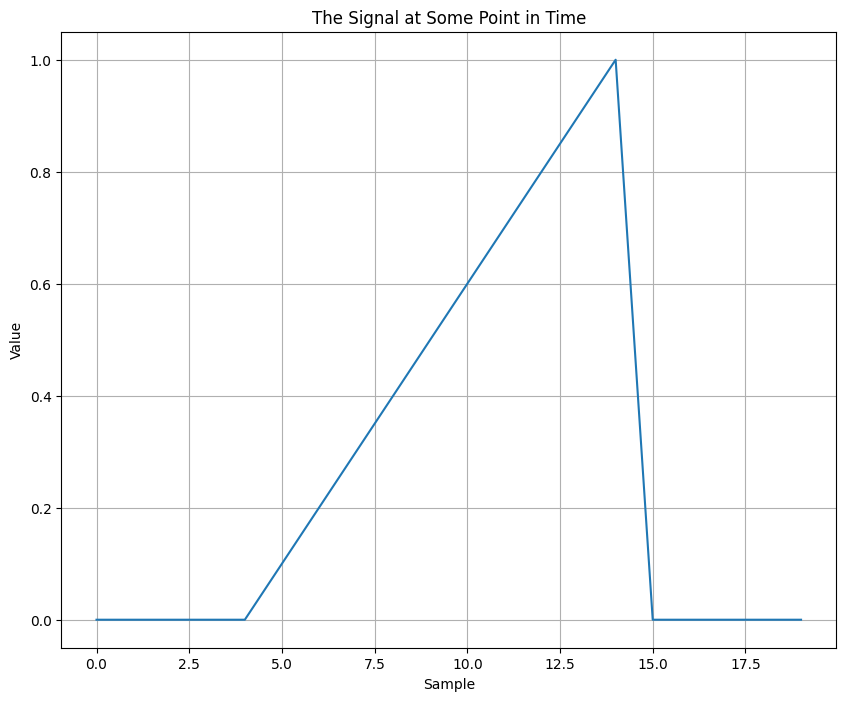

In [14]:
import matplotlib.pyplot as plt #plot with plain matplotlib

sig_inzeros=np.hstack([np.zeros(4),sig,np.zeros(5)])
plt.figure(figsize=(10,8))
plt.plot(sig_inzeros)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('The Signal at Some Point in Time')
plt.grid()

Now we add noise and extend the length of our signal:   

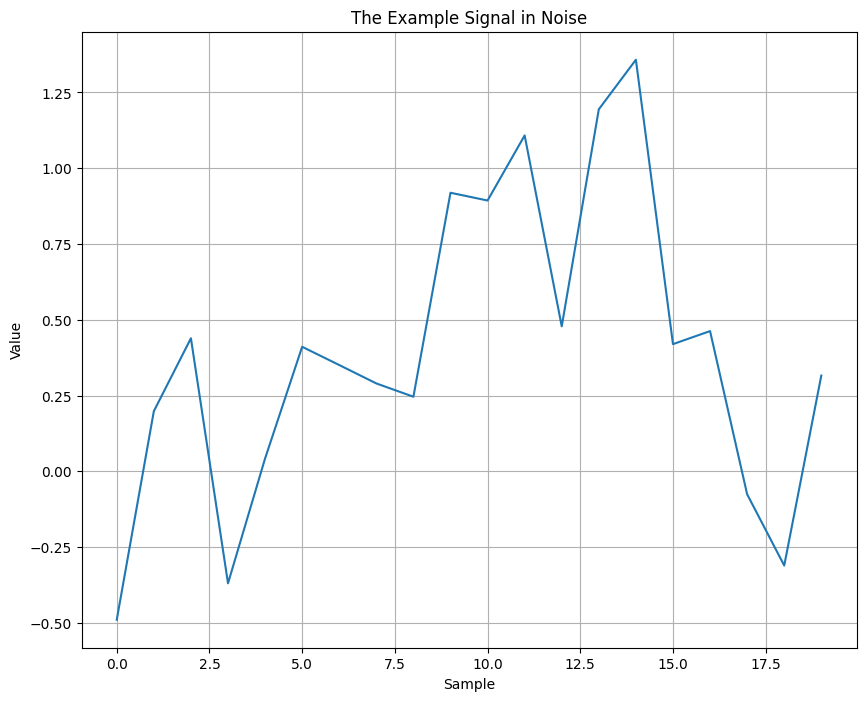

In [15]:
signoise = np.random.rand(20)-0.5 + sig_inzeros #comment out the signal to see the output of the matched filter for only noise.
#Also try different signal patterns to see the output of the matched filter for them.
plt.figure(figsize=(10,8))
plt.plot(signoise)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('The Example Signal in Noise')
plt.grid()
plt.show()

Now we apply our matched filter to it:

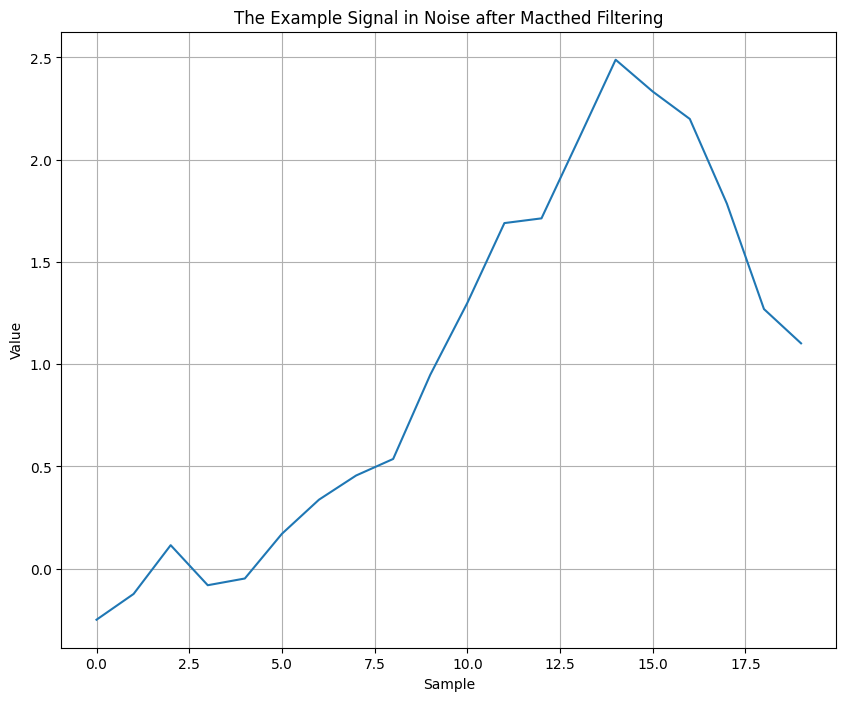

In [16]:
import scipy.signal as sp
h = sig[::-1]/np.linalg.norm(sig) # fliplr, normalize to unit norm
signoisemf = sp.lfilter(h, 1, signoise)
plt.figure(figsize=(10,8))
plt.plot(signoisemf)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('The Example Signal in Noise after Macthed Filtering')
plt.grid()
plt.show()

This is now the output of our matched filter. We can see that we have a maximum at time 14, which marks the **end** of our **detected signal**. Hence we know that the signal started at sample 14-L(length of the filter)=14-11=3, which was indeed the case since we added 4 zeros in the beginning. So matched filtering did a good job!

The **matched filtering** process can also be viewed as computing the **correlation** of the noisy signal with the original signal.

## Convolutional Neural Network Implementation

In [17]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TR8pQRB-4Rg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

Observe that we got a high peak for the detection of our signal, but the peak was somewhat broad, which makes determining the precise location of the signal more difficult. This is because we specified as a target for our optimization that we want to have a high peak, but not necessarily a narrow peak. To remedy this, we can use **numerical optimization** instead of our closed form solution for matched filters.

For that, we can use the optimization of a neural network library, like Pythons “Pytorch”. Pytorch has the advantage, compared to e.g. Keras, that “print” commands work, which is important and useful for debugging.

The following example also serves as a short introduction into neural networks and its terminology.

We can implement our filter using a 1-dimensional “convolutional layer”, object conv1d, without “bias” and without a non-linear “activation function”.

The library “Pytorch” is obtained and installed from www.pytorch.org.

For it we need to specify a “training” signal, here our signal to detect (the “ramp” function) x, and the “target” signal *y*, which is the desired output of the convolutional layer which the optimization should reach as closely as possible during the optimization or “training”.

Our training set is:


In [18]:
x = np.hstack((np.zeros(4),np.arange(0,1.1,0.1),np.zeros(5)))
y = np.zeros(30)
y[16]=1 #Detecting the signal at its end

Observe that for the target y we specified a single peak (the “1”) at the position the filter should detect the signal, and zeros everywhere else. This also leads to a minimization of the output outside the signal detection, which we didn’t have in our closed form solution!

We specify our convolutional detector layer as,

``detector=nn.Sequential(nn.Conv1d(in_channels=1,
out_channels=1, kernel_size=11, stride=1, padding=10,
bias=False))``

Observe that here padding=kernel_size-1, which leads to a causal filter, meaning all its inputs are not in the future. This implements our linear filter as detector. The optimization we apply minimizes the mean squared error (the so called “L2 loss function”).

We can let the optimization run on the same ramp function as before and display the output of the detector with the clean and noisy signal as input with.

In [19]:
"""
Simple program to use a convolutional neural network to obtain a signal detector like matched filter,  using pytorch.
Gerald Schuller, November 2018.
"""

# Imports
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import sys

In [20]:
def signal2pytorch(x):
    #Function to convert a signal vector s, like a mono audio signal, into a 3-d Tensor that conv1d of Pytorch expects,
    #https://pytorch.org/docs/stable/nn.html
    #conv1d Input: (N,Cin,Lin), Cin: numer of input channels (e.g. for stereo), Lin: length of signal, N: number of Batches (signals)
    #Argument x: a 1-d signal as numpy array
    #output: 3-d Tensor X for conv1d input.
    X = np.expand_dims(x, axis=0)  #add channels dimension (here only 1 channel)
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)
    X=torch.from_numpy(X)
    X=X.type(torch.Tensor)
    return X

In [21]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.detector=nn.Sequential(nn.Conv1d(in_channels=1, out_channels=1,
                                              kernel_size=11, stride=1, padding=10, bias=False))

    def forward(self, x):
        out = self.detector(x)
        return out

In [22]:
#Input signal X, a Ramp function:
x= np.hstack((np.zeros(4),np.arange(0,1.1,0.1),np.zeros(5)))
print("x=", x)
X=signal2pytorch(x)
y = np.zeros(30)
y[16]=1 #Detecting the signal at its end (for convolution padding='causal'), like a matched filter.
print("y=", y)
Y=signal2pytorch(y)

print("Input X[0,0,:]=", X[0,0,:], "X.shape=", X.shape )
print("Target Y[0,0,:]=", Y[0,0,:], "Y.shape=", Y.shape)

print("Generate Model:")
#model = generate_model()     # Compile an neural net
model = ConvNet()#.to('cpu')
print("Def. loss function:")
loss_fn = nn.MSELoss(size_average=False)
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

for epoch in range(5000):
    Ydet=model(X)
    loss=loss_fn(Ydet, Y)
    if epoch%100==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.save(model.state_dict(), 'model_detector.torch')
Ydet=model(X)
Ydet=Ydet.data.numpy()
#xnoisy=x+np.random.normal(size=x.shape)*0.1
xnoisy=x+np.random.rand(20)-0.5
Xnoisy=signal2pytorch(xnoisy)
Ydetnoisy=model(Xnoisy)
Ydetnoisy=Ydetnoisy.data.numpy()
print("Predictions= ", Ydet[0,0,:])
weights=list(model.parameters())
print("Pytorch weights=", weights[0].data.numpy())

print("Y=", Y)


x= [0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.  0.  0.
 0.  0. ]
y= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Input X[0,0,:]= tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.2000, 0.3000, 0.4000,
        0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]) X.shape= torch.Size([1, 1, 20])
Target Y[0,0,:]= tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) Y.shape= torch.Size([1, 1, 30])
Generate Model:
Def. loss function:


/usr/local/lib/python3.12/dist-packages/torch/nn/_reduction.py:51: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



0 2.3544323444366455
100 1.0186175107955933
200 0.7981289029121399
300 0.6305161118507385
400 0.5020257234573364
500 0.4033355712890625
600 0.32660260796546936
700 0.2659134864807129
800 0.21723245084285736
900 0.17787548899650574
1000 0.14596614241600037
1100 0.12009043991565704
1200 0.09912372380495071
1300 0.08215237408876419
1400 0.06843089312314987
1500 0.05735312029719353
1600 0.04842820391058922
1700 0.041259512305259705
1800 0.03552611172199249
1900 0.030966956168413162
2000 0.027368389070034027
2100 0.02455371618270874
2200 0.022375866770744324
2300 0.020711669698357582
2400 0.019457746297121048
2500 0.0185275636613369
2600 0.017849203199148178
2700 0.01736355572938919
2800 0.017022721469402313
2900 0.0167885459959507
3000 0.016631241887807846
3100 0.016528094187378883
3200 0.01646214723587036
3300 0.016421115025877953
3400 0.01639629155397415
3500 0.016381729394197464
3600 0.016373448073863983
3700 0.016368890181183815
3800 0.01636648178100586
3900 0.01636524684727192
4000 0.

We use the same type as input as before.

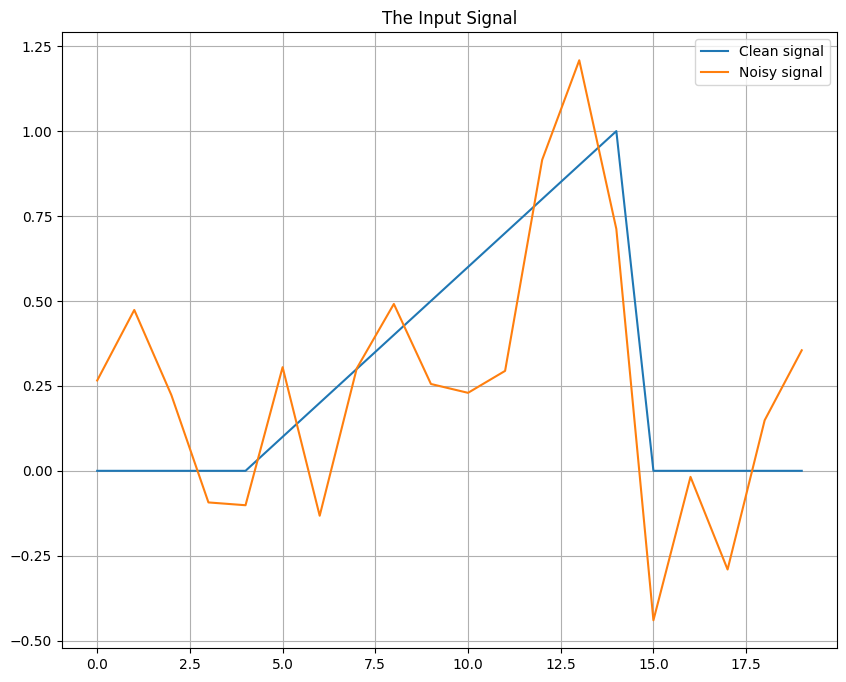

In [23]:
plt.figure(figsize=(10,8))
plt.plot(x)
plt.plot(xnoisy)
plt.legend(('Clean signal', 'Noisy signal'))
plt.title('The Input Signal')
plt.grid()

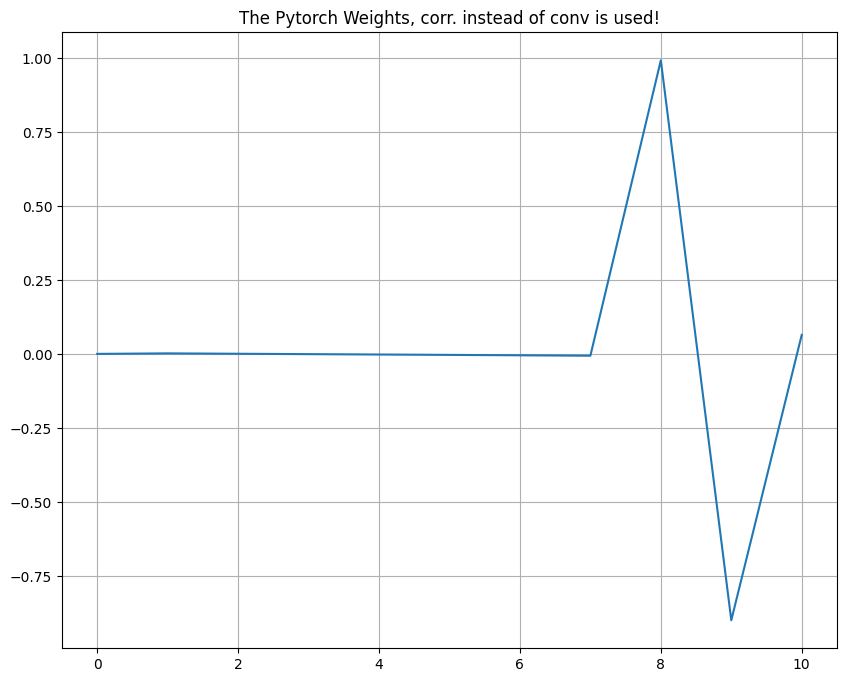

In [24]:
plt.figure(figsize=(10,8))
plt.plot(weights[0].data.numpy()[0,0,:])
plt.title('The Pytorch Weights, corr. instead of conv is used!')
plt.grid()

The figure shows the obtained weights or coefficients, in pytorch they are used as correlation instead of convolution, and hence the plot is a time-reversed impulse response.

**Observe** that it looks indeed different from our matched filter, which was simply the (time-reversed) ramp signal.

This is because the optimization also tries to minimized the output outside the detection time point.

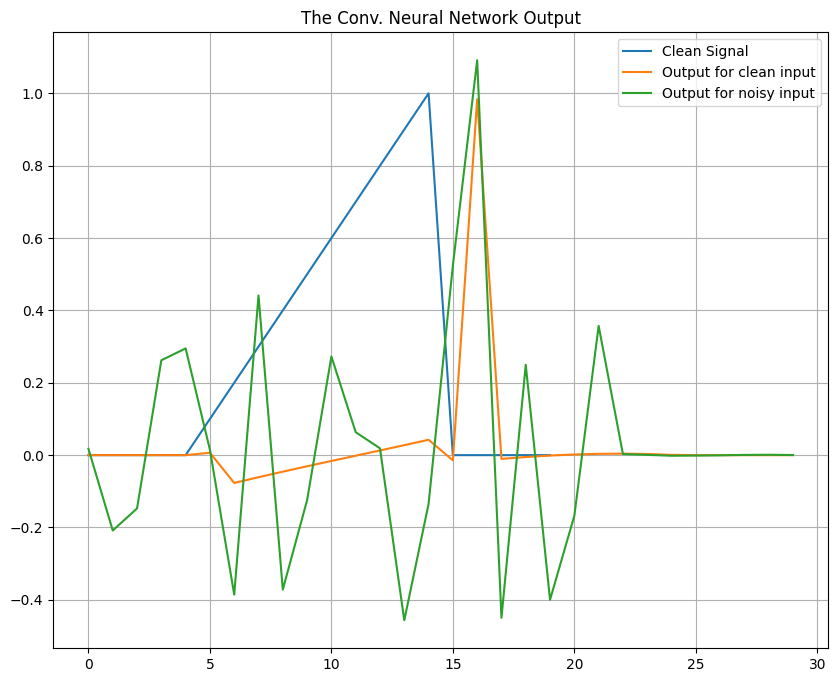

In [25]:
plt.figure(figsize=(10,8))
plt.plot(x)
plt.plot(Ydet[0,0,:])
plt.plot(Ydetnoisy[0,0,:])
plt.legend(('Clean Signal','Output for clean input', 'Output for noisy input'))
plt.title('The Conv. Neural Network Output')
plt.grid()

The result of the detection for the clean and noisy signals.

Observe the peak at the detection time point is indeed much more narrow than for the matched filter! Also observe that the time point of the detection depends on how we set it in the target signal.

x= [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.
 0.  0. ]


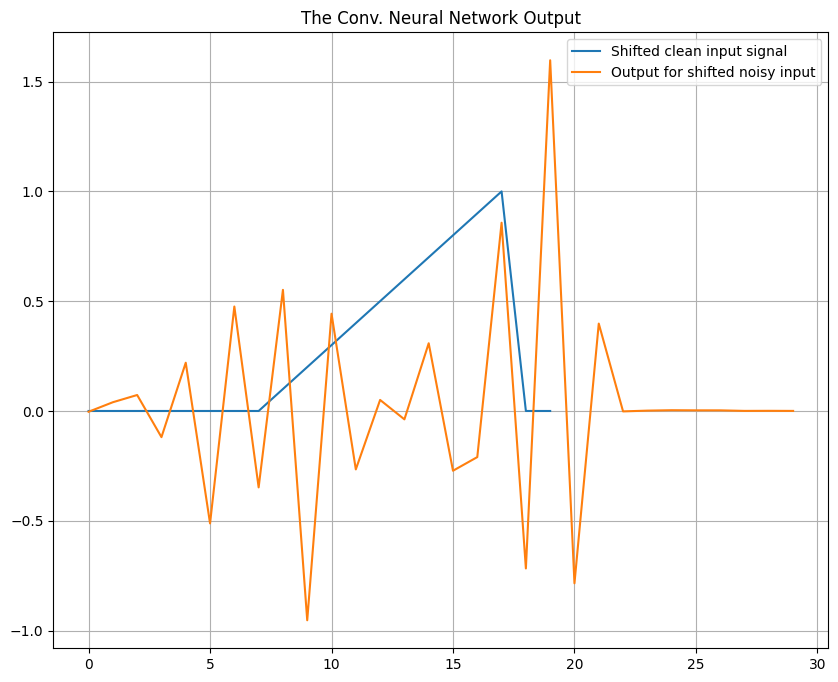

In [26]:
#Input signal X, a Ramp function:
x= np.hstack((np.zeros(7),np.arange(0,1.1,0.1),np.zeros(2)))
print("x=", x)
xnoisy=x+np.random.rand(20)-0.5
Xnoisy=signal2pytorch(xnoisy)

Ydetnoisy=model(Xnoisy)
Ydetnoisy=Ydetnoisy.data.numpy()

plt.figure(figsize=(10,8))
#plt.plot(Ydet[0,0,:])
plt.plot(x)
plt.plot(Ydetnoisy[0,0,:])
plt.legend(('Shifted clean input signal', 'Output for shifted noisy input'))
plt.title('The Conv. Neural Network Output')
plt.grid()